In [1]:
import pandas as pd
import sqlite3
import sqlalchemy as db
#import matplotlib as plt
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)

In [3]:
#use db.execute(<SQL query command>) to query database

connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)

2019-11-26 13:55:34,864 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-26 13:55:34,866 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:55:34,871 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-26 13:55:34,872 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:55:34,875 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-11-26 13:55:34,876 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:55:34,880 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-11-26 13:55:34,881 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:55:34,883 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-11-26 13:55:34,887 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 13:55:34,888 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [4]:
flights.columns.keys()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [5]:
# flights.columns.keys()
q = session.query(flights.columns.Origin)

In [6]:
from collections import Counter
total = Counter(q.all())

2019-11-26 13:55:34,957 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-11-26 13:55:34,958 INFO sqlalchemy.engine.base.Engine SELECT ontime."Origin" AS "ontime_Origin" 
FROM ontime
2019-11-26 13:55:34,959 INFO sqlalchemy.engine.base.Engine ()


In [39]:
total

c3 = dict(total)
c4 = sorted(c3.items(), key=lambda pair: pair[1], reverse=True)

print(c4)

[(('ATL',), 3206135), (('ORD',), 3145926), (('DFW',), 2705128), (('LAX',), 1993952), (('PHX',), 1687348), (('IAH',), 1588183), (('DEN',), 1584892), (('LAS',), 1414631), (('DTW',), 1333414), (('MSP',), 1273128), (('EWR',), 1262541), (('SFO',), 1148292), (('BOS',), 1108979), (('SLC',), 1080683), (('CLT',), 1065916), (('LGA',), 1045475), (('CVG',), 1039371), (('PHL',), 1018360), (('MCO',), 980676), (('SEA',), 954592), (('BWI',), 911055), (('STL',), 884414), (('IAD',), 786380), (('DCA',), 786143), (('JFK',), 780953), (('SAN',), 771531), (('MDW',), 711427), (('CLE',), 656690), (('TPA',), 647451), (('PIT',), 612674), (('OAK',), 602176), (('MIA',), 591729), (('SJC',), 567663), (('FLL',), 554483), (('MCI',), 534990), (('MEM',), 518620), (('BNA',), 517956), (('HOU',), 511697), (('PDX',), 503711), (('RDU',), 482575), (('DAL',), 429985), (('SMF',), 429579), (('SNA',), 424352), (('MSY',), 404275), (('AUS',), 393137), (('SAT',), 363951), (('IND',), 356561), (('ABQ',), 339203), (('HNL',), 336683), (

In [7]:
#newtotal = dict(total)
#print(newtotal['ABE'])
#newtotal

In [8]:
q2 = q.filter(flights.columns.ArrDelay.cast(db.Integer) >= 60)

In [9]:
q3 = q.filter(flights.columns.ArrDelay.cast(db.Integer) >= 180)

In [10]:
q4 = q.filter(flights.columns.ArrDelay.cast(db.Integer) >= 300)

In [11]:
# for >= 60 min delay
airlineCities = q2.all()

2019-11-26 14:10:24,064 INFO sqlalchemy.engine.base.Engine SELECT ontime."Origin" AS "ontime_Origin" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-11-26 14:10:24,067 INFO sqlalchemy.engine.base.Engine (60,)


In [13]:
counter = Counter(airlineCities)
pDict = {}
for airline in total.keys():
    if(total[airline] >= 50000):
        pDict[airline] = counter[airline]/total[airline]

In [14]:
# get 14 most common because there were 4 non-international airports
Counter(pDict).most_common(14)

[(('ORD'), 0.09112007084718458),
 (('EWR'), 0.08826564840270534),
 (('JFK'), 0.08600005378044517),
 (('HPN'), 0.08228553904485768),
 (('PHL'), 0.08206233551985545),
 (('BTV'), 0.08052262104560302),
 (('PWM'), 0.07590988322564579),
 (('CAE'), 0.07524905823828212),
 (('XNA'), 0.07447228138981866),
 (('LGA'), 0.07322317606829432),
 (('IAD'), 0.07230728146697525),
 (('CAK'), 0.07214031708401245),
 (('MIA'), 0.07187580801346562),
 (('ROC'), 0.07158354486025043)]

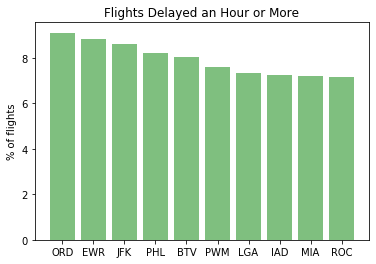

 ORD = O'Hare International 
 EWR = Newark Liberty International 
 JFK = JFK International 
 PHL = Philadelphia International 
 BTV = Burlington International 
 PWM = Portland International Jetport
 LGA = Laguardia 
 IAD = Dulles International 
 MIA = Miami International 
 ROC = Greater Rochester International


In [15]:
# graph for delays >= 60 mins
objects = ('ORD', 'EWR', 'JFK','PHL','BTV','PWM','LGA','IAD', 'MIA','ROC')
y_pos = np.arange(len(objects))
performance = [9.112,8.826,8.6,8.206,8.052,7.591,7.322,7.23,7.187,7.158]


plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'g')
plt.xticks(y_pos, objects)
plt.ylabel('% of flights')
plt.title('Flights Delayed an Hour or More')

plt.show()

print(""" ORD = O'Hare International \n EWR = Newark Liberty International \n JFK = JFK International 
 PHL = Philadelphia International \n BTV = Burlington International \n PWM = Portland International Jetport
 LGA = Laguardia \n IAD = Dulles International \n MIA = Miami International \n ROC = Greater Rochester International""")

In [16]:
# for >= 180 min delay
airlineCities3 = q3.all()

2019-11-26 14:14:48,885 INFO sqlalchemy.engine.base.Engine SELECT ontime."Origin" AS "ontime_Origin" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-11-26 14:14:48,887 INFO sqlalchemy.engine.base.Engine (180,)


In [17]:
counter3 = Counter(airlineCities3)
pDict3 = {}
for airline in total.keys():
    if(total[airline] > 50000):
        pDict3[airline] = counter3[airline]/total[airline]

In [18]:
# checking the top 20 to get the top 10 international
Counter(pDict3).most_common(20)

[(('SGF'), 0.012923912510020123),
 (('BTV'), 0.012812877844549113),
 (('JFK'), 0.01254108761986957),
 (('HPN'), 0.012350497644205302),
 (('PWM'), 0.011703647396495459),
 (('EWR'), 0.011648730615481002),
 (('CAE'), 0.011432396603095016),
 (('XNA'), 0.011270018370129944),
 (('BTR'), 0.011022551387944626),
 (('ROC'), 0.010755966477119641),
 (('PHL'), 0.010379433599120153),
 (('IAD'), 0.010163025509295761),
 (('CAK'), 0.010020002963401985),
 (('LEX'), 0.009884602295579),
 (('ORD'), 0.009775817994447421),
 (('MSN'), 0.009738503155996394),
 (('MDT'), 0.009543827756632392),
 (('GRB'), 0.009462886558915931),
 (('BUF'), 0.009375544473796979),
 (('DSM'), 0.009111111111111111)]

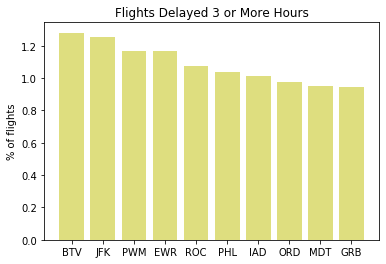

 BTV = Burlington International 
 JFK = JFK International 
 PWM = Portland International Jetport
 EWR = Newark Liberty International 
 ROC = Greater Rochester International 
 PHL = Philadelphia International
 IAD = Dulles International 
 ORD = O'Hare International 
 MDT = Harrisburg International 
 GRB = Green Bay Austin Straubel International


In [19]:
# graph for delays >= 180 mins
objects = ('BTV','JFK','PWM','EWR','ROC','PHL','IAD','ORD','MDT','GRB')
y_pos = np.arange(len(objects))
performance = [1.281,1.254,1.17,1.165,1.076,1.038,1.0163,.978,.954,.946]


plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'y')
plt.xticks(y_pos, objects)
plt.ylabel('% of flights')
plt.title('Flights Delayed 3 or More Hours')

plt.show()

print(""" BTV = Burlington International \n JFK = JFK International \n PWM = Portland International Jetport
 EWR = Newark Liberty International \n ROC = Greater Rochester International \n PHL = Philadelphia International
 IAD = Dulles International \n ORD = O'Hare International \n MDT = Harrisburg International 
 GRB = Green Bay Austin Straubel International""")

In [20]:
# for >= 300 min delay
airlineCities2 = q4.all()

2019-11-26 14:15:22,263 INFO sqlalchemy.engine.base.Engine SELECT ontime."Origin" AS "ontime_Origin" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-11-26 14:15:22,267 INFO sqlalchemy.engine.base.Engine (300,)


In [21]:
counter2 = Counter(airlineCities2)
pDict2 = {}
for airline in total.keys():
    if(total[airline] > 50000):
        pDict2[airline] = counter2[airline]/total[airline]

In [22]:
# checking the top 20 to get the top 10 international
Counter(pDict2).most_common(20)

[(('SGF'), 0.004384314623652396),
 (('BTR'), 0.003703114377052263),
 (('BTV'), 0.003049825853139155),
 (('PWM'), 0.0027391515183287246),
 (('XNA'), 0.002716074427201316),
 (('HPN'), 0.002439432378934456),
 (('CAE'), 0.0024151101894023916),
 (('ROC'), 0.0023965172506700324),
 (('JFK'), 0.0023407298518604834),
 (('SJU'), 0.0022659221493890104),
 (('DSM'), 0.0021642512077294685),
 (('LEX'), 0.002150171704359125),
 (('MSN'), 0.0021039975954313195),
 (('BUF'), 0.0020954883429631617),
 (('MDT'), 0.002087712321763336),
 (('TYS'), 0.0020791140604128067),
 (('GRR'), 0.00202938156415999),
 (('ICT'), 0.0020264298186992045),
 (('SYR'), 0.0020207077841955614),
 (('CID'), 0.0019731106318542652)]

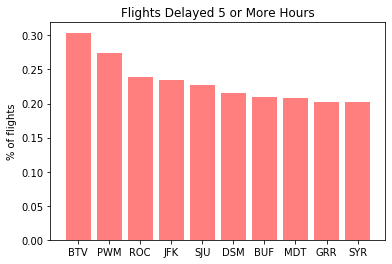

 BTV = Burlington International 
 PWM = Portland International Jetport 
 ROC = Greater Rochester International
 JFK = JFK International 
 SJU = Luis Muñoz Marin International 
 DSM = Des Moines International
 BUF = Buffalo Niagara International 
 MDT = Harrisburg International 
 GRR = Gerald R. Ford International
 SYR = Syracuse Hancock International 


In [23]:
# graph for delays >= 300 mins
objects = ('BTV','PWM','ROC','JFK','SJU','DSM','BUF','MDT','GRR','SYR')
y_pos = np.arange(len(objects))
performance = [.304,.274,.239,.234,.227,.216,.209,.208,.202,.202]


plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'r')
plt.xticks(y_pos, objects)
plt.ylabel('% of flights')
plt.title('Flights Delayed 5 or More Hours')

plt.show()

print(""" BTV = Burlington International \n PWM = Portland International Jetport \n ROC = Greater Rochester International
 JFK = JFK International \n SJU = Luis Muñoz Marin International \n DSM = Des Moines International
 BUF = Buffalo Niagara International \n MDT = Harrisburg International \n GRR = Gerald R. Ford International
 SYR = Syracuse Hancock International """)